In [61]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
mat = scipy.io.loadmat('mnist_all.mat')

In [2]:
""" 
def inner_product(X, Y, W, p):
    if X.shape[1] != Y.shape[0]:
        raise Exception('Mismatched shape: \n Shape of X = ' + str(X.shape) + '\n' + 'Shape of Y = ' + str(Y.shape))
    
    if(p==2):
        return np.dot(X, Y)

    s = 0

    for i in range(X.shape[0]):
        n_ij = np.power(np.abs(W[i]), p-2)
        s += n_ij*X[i]*Y[i]
    return s """

In [41]:
hidden = 200
inp = 784

lr = 1e-1
delta = 0.4

list(mat.keys())
mat['train0']
ex = (mat['train0']/255.0)
print(ex.shape)

W = np.random.normal(0.0, 1.0, (inp, hidden))



(5923, 784)


In [14]:
Q = np.zeros((hidden, 1))
for j in range(hidden):
    Q[j] = inner_product(ex, W[:,j], W[:,j], 2)


def activation(Q):
    Q_sort = Q.argsort(axis=0)
    new_Q = np.zeros((hidden, 1))
    new_Q[Q_sort[-1][0]] = 1.0
    new_Q[Q_sort[-2][0]] = -delta
    return new_Q


ValueError: could not broadcast input array from shape (5923,) into shape (1,)

In [15]:
Q_sort = Q.argsort(axis=0)

In [16]:
Q_sort.shape
Q[Q_sort[-1][0]]

array([0.])

In [17]:

Q = np.zeros((hidden, 1))
for j in range(hidden):
    Q[j] = inner_product(ex, W[:,j], W[:,j], 2)




dW = np.zeros_like(W)
for j in range(hidden):
    for i in range(inp):
        dW_ij = activation(Q)[j]*(ex[i] - inner_product(ex, W[:,j], W[:,j], 2)*W[i, j])
        dW[i, j] = dW_ij
print(dW.max())

W += lr*dW/np.argmax(dW)

ValueError: could not broadcast input array from shape (5923,) into shape (1,)

In [68]:
def inner_product(X, Y, W, p):
    if X.shape[1] != Y.shape[0]:
        raise Exception('Mismatched shape: \n Shape of X = ' + str(X.shape) + '\n' + 'Shape of Y = ' + str(Y.shape))
    
    if(p==2):
        return np.dot(X, Y)

    s = 0

    for i in range(X.shape[0]):
        n_ij = np.power(np.abs(W[i]), p-2)
        s += n_ij*X[i]*Y[i]
    return s


def train_batch(inputs: np.ndarray, W: np.ndarray, p = 2, k = 2 , delta = 0.4, lr = 0.01): # p is Lebesgue-p norm number. k is which ranking of the hidden states should be discouraged for an example. delta is the value used in the activation function.
    m = inputs.shape[0] # Number of training examples in batch.
    n = inputs.shape[1] # Number of input values, in this case 784. Inputs is an (m x n) matrix
    
    hidden = W.shape[1] # W is a (n x hidden) matrix.

    
    h1 = inner_product(inputs, W, W, 2) # h1 will be a (m x hidden) matrix containing the hidden states before the activation function has been applied.

    h1_sorted = np.argsort(h1, axis=1) # Creates the list of sorted indexes for the hidden states.

    
    a1 = np.zeros_like(h1) # Creates template array for the hidden states after activations. (m x hidden) matrix.

    a1[np.array(range(m)), h1_sorted[:, -1]] = 1.0 # Sets the indexes with the maximum hidden state to be 1.0 in each example.
    a1[np.array(range(m)), h1_sorted[:, -k]] = -delta # Sets the indexes with the maximum hidden state to be 1.0 in each example.

    gQv = np.dot(np.transpose(inputs), a1) #First term of equation 3.

    gWv = np.reshape(np.sum(np.multiply(h1, a1), axis=0), (1, hidden)) # (1 x hidden) matrix

    gWvW = np.multiply(W, gWv) # Second term in equation 3.

    dW = gQv - gWvW # Add together to get the change in parameters.


    W += lr*np.divide(dW, np.max(np.absolute(dW))) # Normalize change in weights to avoid explosion of parameter magnitude.

    return W

print(W.shape)
train_batch(ex[:], W)
print(W.shape)

(784, 200)
(784, 200)


In [76]:
batch_size = 50
epochs = 80
reset = False

hidden = 200
inp = 784

lr = 1e-1
delta = 0.4

if reset:
    W = np.random.normal(0.0, 1.0, (inp, hidden))


M=np.zeros((0,784))
for i in range(10):
    M=np.concatenate((M, mat['train'+str(i)]), axis=0)

print(M.shape)

for epoch in range(epochs):
    print('Epoch: '+str(epoch + 1))
    for i in range(M.shape[0]//batch_size):
        batch = M[batch_size*i: batch_size*(i+1), :]
        W = train_batch(batch, W)
        
        

(60000, 784)
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80


In [77]:
def draw_weights(synapses, Kx, Ky):
    fig=plt.figure(figsize=(12.9,10))
    yy=0
    HM=np.zeros((28*Ky,28*Kx))
    for y in range(Ky):
        for x in range(Kx):
            HM[y*28:(y+1)*28,x*28:(x+1)*28]=synapses[yy,:].reshape(28,28)
            yy += 1
    plt.clf()
    nc=np.amax(np.absolute(HM))
    im=plt.imshow(HM,cmap='bwr',vmin=-nc,vmax=nc)
    fig.colorbar(im,ticks=[np.amin(HM), 0, np.amax(HM)])
    plt.axis('off')
    fig.canvas.draw()

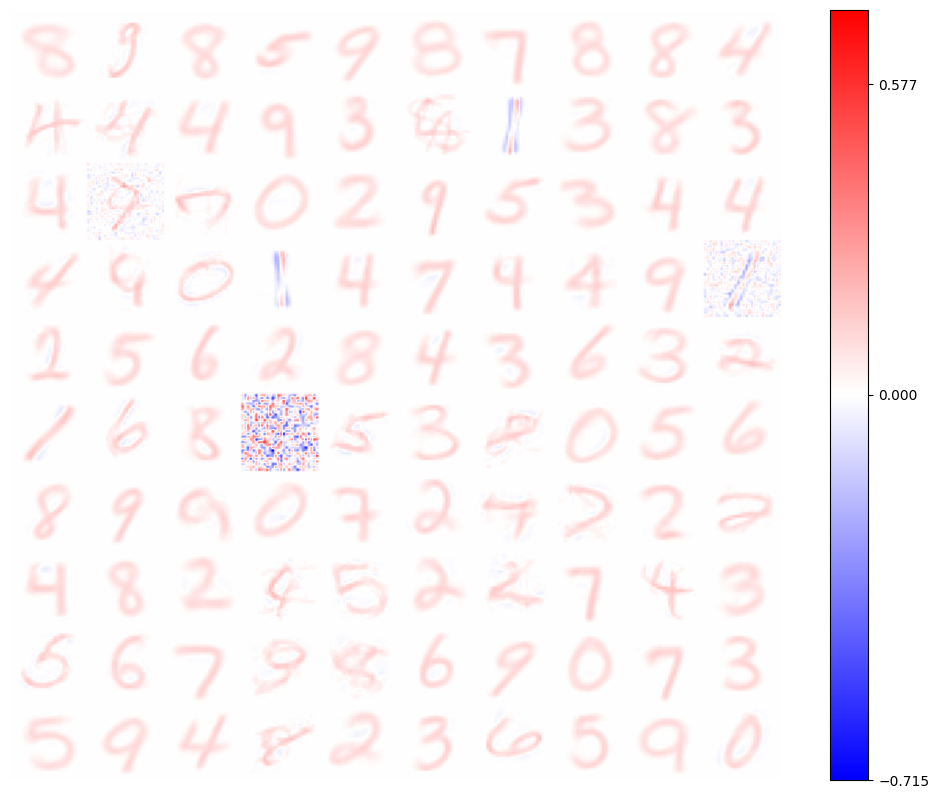

In [78]:
%matplotlib inline
Kx=10
Ky=10
draw_weights(np.transpose(W), Kx, Ky)